# Blockly Trial Map Generator

In this notebook, we will generate trial maps for the experiment

In [3]:
# import modules
import numpy as np
import sys
sys.path.append("../src/") # go to source dir


In [4]:
# import classes and functions
from utils import showLevelWithAgentPNG, showLevelPNGMark
from trial import Trial


In [5]:
# generate a trial
trial = Trial(id=21)

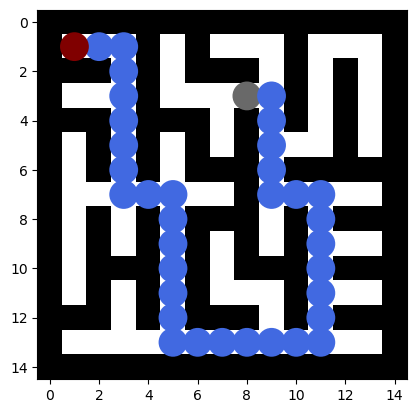

In [6]:
# show the trial map
showLevelWithAgentPNG(trial.maze, trial.agent.path)

In [7]:
# show the json representation of the trial
trial.to_json()

'{"trial_id": 21, "maze": [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1], [1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1], [1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1], [1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1], [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1], [1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1], [1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1], [1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1], [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1], [1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1], [1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1], [1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1], [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]], "agent": {"agent_id": 21, "path": [[3, 8], [3, 9], [4, 9], [5, 9], [6, 9], [7, 9], [7, 10], [7, 11], [8, 11], [9, 11], [10, 11], [11, 11], [12, 11], [13, 11], [13, 10], [13, 9], [13, 8], [13, 7], [13, 6], [13, 5], [12, 5], [11, 5], [10, 5], [9, 5], [8, 5], [7, 5], [7